In [1]:
from google.colab import drive
import os
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path
ratings_dir = Path("/content/drive/MyDrive/deep_learning_training/experiments/letterboxd/crawled/ratings")

df_all = pd.concat(
    (pd.read_csv(f) for f in ratings_dir.glob('*.csv')),
    ignore_index=True
)

print(len(df_all)) # already verified that data has no duplicates

19613961


In [3]:
movie_popularity = df_all["movie_id"].value_counts()
print("Unique movies: ", movie_popularity.count())
print("Most watched movies:")
print(movie_popularity.head())

Unique movies:  399514
Most watched movies:
movie_id
barbie                               9482
parasite-2019                        8914
get-out-2017                         8692
everything-everywhere-all-at-once    8518
la-la-land                           8510
Name: count, dtype: int64


In [4]:
import matplotlib.pyplot as plt
popularity_brackets = movie_popularity.value_counts()
print("Top popularity brackets: ")
print(popularity_brackets.head())

Top popularity brackets: 
count
1    128290
2     58014
3     33243
4     22401
5     16158
Name: count, dtype: int64


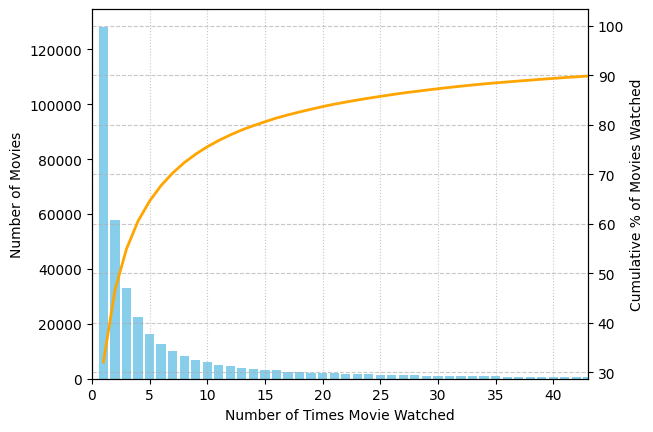

In [18]:
import numpy as np
occurrences = sorted(popularity_brackets.keys())
counts = [popularity_brackets[entry] for entry in occurrences]
cum_percent = np.cumsum(counts) / np.sum(counts) * 100

_, ax1 = plt.subplots()
ax1.bar(occurrences, counts, color='skyblue')
ax1.set_xlabel('Number of Times Movie Watched')
ax1.set_ylabel('Number of Movies')

ax2 = ax1.twinx()
ax2.plot(occurrences, cum_percent, color='orange', linewidth=2)
ax2.set_ylabel('Cumulative % of Movies Watched')

ax1.grid(True, axis='x', linestyle=':', alpha=0.7)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

limit_width_to_percent = np.searchsorted(cum_percent, 90)
plt.xlim(0,limit_width_to_percent)

plt.show()

# Considerations:
# Memory can be reduced a lot by ignoring movies that have been watched only a few times
# 30% saving by just removing movies watched once, 75% savings by removing movies watched less than 10 times

In [19]:
user_watchcount = df_all["user_id"].value_counts()
print("Unique users: ", user_watchcount.count())
print("Most active users:")
print(user_watchcount.head())

Unique users:  11719
Most active users:
user_id
acervofilmico    90704
punq             40265
geesuss          35151
loureviews       27054
voidness         24318
Name: count, dtype: int64


In [20]:
import matplotlib.pyplot as plt
watchcount_brackets = user_watchcount.value_counts()
print("Top user watchcount brackets: ")
print(watchcount_brackets.head())

Top user watchcount brackets: 
count
1      22
684    14
698    14
720    14
568    13
Name: count, dtype: int64


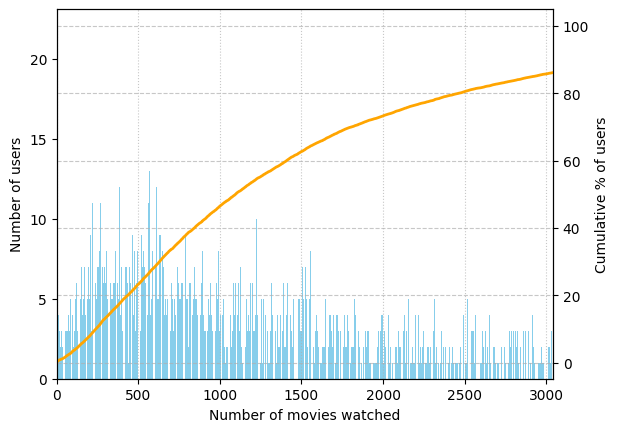

In [24]:
import numpy as np
occurrences = sorted(watchcount_brackets.keys())
counts = [watchcount_brackets[entry] for entry in occurrences]
cum_percent = np.cumsum(counts) / np.sum(counts) * 100

_, ax1 = plt.subplots()
ax1.bar(occurrences, counts, color='skyblue')
ax1.set_xlabel('Number of movies watched')
ax1.set_ylabel('Number of users')

ax2 = ax1.twinx()
ax2.plot(occurrences, cum_percent, color='orange', linewidth=2)
ax2.set_ylabel('Cumulative % of users')

ax1.grid(True, axis='x', linestyle=':', alpha=0.7)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

limit_width_to_percent = np.searchsorted(cum_percent, 90)
plt.xlim(0,limit_width_to_percent)

plt.show()

# Considerations
# The distribution is pretty linear, so there is no gain to be had to cutoff the least active users.
# I think the difference between this data and the movie data is how I crawled them.
# If I started crawling from popular movies, users would be the one with the pareto distribution